### Inspect filtering with ACAE  
Use output for the entire set and check reconstruction errors - image by image.
Using ACAE with 32D latent, 1500 epoch

In [1]:
import json
import seaborn as sn
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set up font for export to make it illustrator friendly
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [29]:
# import JSON file
with open('/home/aogorodnikov/aae_filter_classes/classes_rgb_corrected_Fin.json', 'r') as json_file:  
    data = json.load(json_file)

## Distributions  
Compare distributions of losses within classes

In [30]:
df = pd.DataFrame(data)
df['phenotype'] = df.image.str.split(pat='/', expand=True).iloc[:,4]

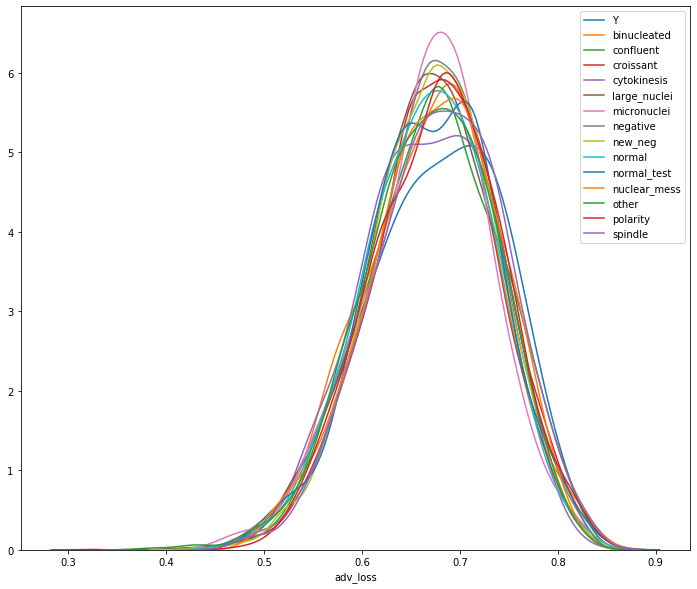

In [31]:
fig, ax = plt.subplots(figsize=(12, 10))
for l in df.phenotype.unique():
    to_plot = df[df.phenotype == l]
    g = sns.distplot(to_plot.adv_loss, hist=False, label=l)

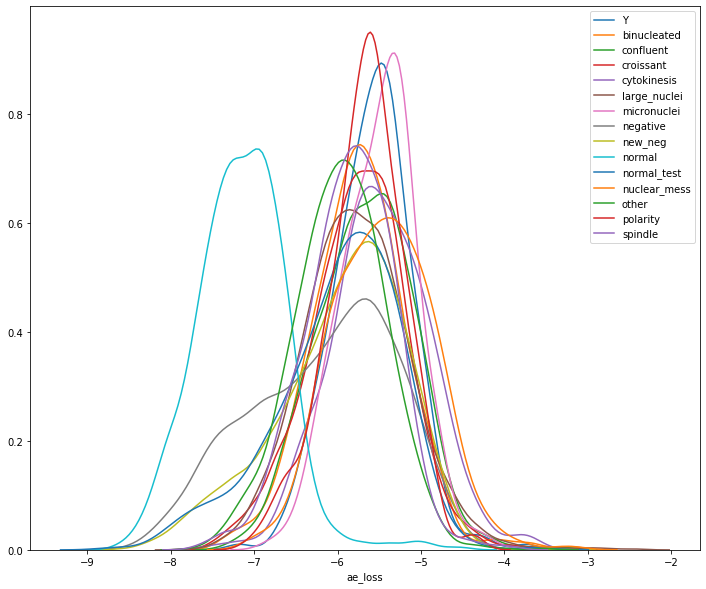

In [32]:
fig, ax = plt.subplots(figsize=(12, 10))
for l in df.phenotype.unique():
    to_plot = df[df.phenotype == l]
    g = sns.distplot(np.log(to_plot.ae_loss), hist=False, label=l)

In [66]:
to_plot = ['polarity', 'normal_test', "other", 'normal']
df_sub = df[df.phenotype.isin(to_plot)]

In [67]:
df_sub.shape

(3165, 4)

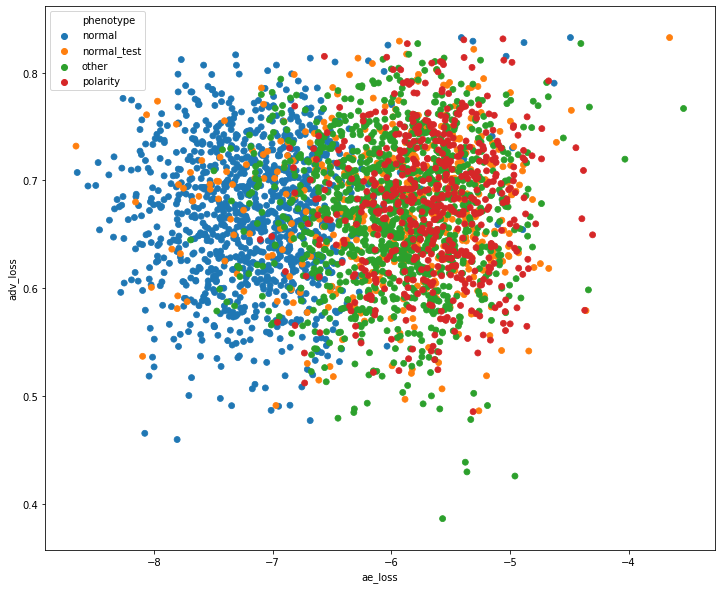

In [68]:
fig, ax = plt.subplots(figsize=(12, 10))


ax = sn.scatterplot(np.log(df_sub.ae_loss), df_sub.adv_loss, hue=df_sub.phenotype, edgecolor=None)


In [10]:
pd.DataFrame(data['ae_loss']).describe()

,0
count,29501.000000
mean,0.003415
std,0.002757
min,0.000174
25%,0.001706
50%,0.002911
75%,0.004453
max,0.091711


In [15]:
pd.DataFrame(data['adv_loss']).describe()

,0
count,29055.000000
mean,0.672777
std,0.065189
min,0.348918
25%,0.629251
50%,0.674851
75%,0.718697
max,0.832555
